In [221]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [222]:
drill_life_filename = "drill_life.csv"
drill_life_data = pd.read_csv(drill_life_filename, delimiter=",")

for col in drill_life_data.columns[:-1]:
    drill_life_data[col] = drill_life_data[col].astype(float)
drill_life_data.columns

Index(['Drill Velocity (mm/min)', 'Total cycle time for a drilled hole (sec)',
       'Dill life (no. of holes)', 'Drill wear/failure observation'],
      dtype='object')

In [223]:
drill_life_data["Tool life (min)"] = (1/60)*drill_life_data["Total cycle time for a drilled hole (sec)"]*drill_life_data["Dill life (no. of holes)"]
drill_life_data["Drill Velocity (m/min)"] = (1/1000)*drill_life_data["Drill Velocity (mm/min)"]


In [224]:
# x_label = "Tool life (min)"
x_label = "Dill life (no. of holes)"
y_label = "Drill Velocity (m/min)"

In [225]:
from scipy.stats import linregress

In [226]:
fit_lin = linregress(drill_life_data[x_label], drill_life_data[y_label])
fit_lin

LinregressResult(slope=-0.0036589762076423937, intercept=0.2443914924297044, rvalue=-0.9999543431983492, pvalue=0.006083444015631153, stderr=3.496569762940584e-05, intercept_stderr=0.0009660493473469276)

In [227]:
fit_log = linregress(np.log(drill_life_data[x_label]), np.log(drill_life_data[y_label]))
fit_log

LinregressResult(slope=-0.3718643879360522, intercept=-0.9368127501667487, rvalue=-0.9006966696652624, pvalue=0.28611341121942074, stderr=0.17936774422127255, intercept_stderr=0.5007849392297807)

C:\Users\Luke A Sargen\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
C:\Users\Luke A Sargen\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


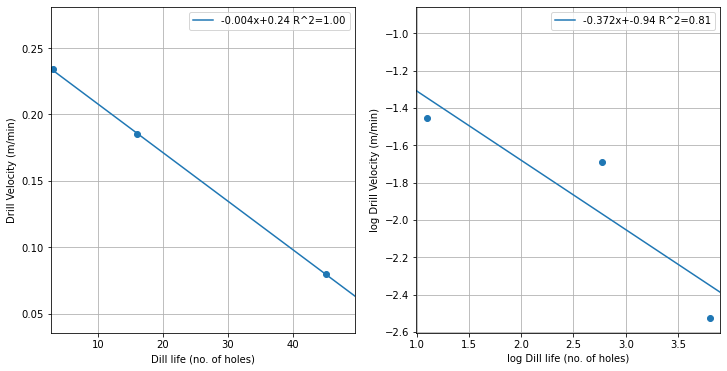

In [228]:
fig = plt.figure(figsize=(12,6))
ax1, ax2 = fig.subplots(nrows=1, ncols=2)

xlims = (drill_life_data[x_label].min()*0.9, drill_life_data[x_label].max()*1.1)

fake_x_data = np.arange(drill_life_data[x_label].min()-10, drill_life_data[x_label].max()+10)

ax1.scatter(drill_life_data[x_label], drill_life_data[y_label])
ax1.plot(fake_x_data, fit_lin.slope*fake_x_data+fit_lin.intercept, label=f"{fit_lin.slope:.3f}x+{fit_lin.intercept:.2f} R^2={fit_lin.rvalue**2:.2f}")
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label)
ax1.set_xlim(xlims)
ax1.grid()
ax1.legend()


ax2.scatter(np.log(drill_life_data[x_label]), np.log(drill_life_data[y_label]))
ax2.plot(np.log(fake_x_data), (fit_log.slope*np.log(fake_x_data))+fit_log.intercept, label=f"{fit_log.slope:.3f}x+{fit_log.intercept:.2f} R^2={fit_log.rvalue**2:.2f}")
ax2.set_xlabel("log " + x_label)
ax2.set_ylabel("log " + y_label)
ax2.set_xlim(np.log(xlims))
ax2.grid()
ax2.legend()


In [229]:
tool_wear_filename = "tool_wear.csv"
tool_wear_data = pd.read_csv(tool_wear_filename, delimiter=",")

for col in tool_wear_data.columns:
    tool_wear_data[col] = tool_wear_data[col].astype(float)
tool_wear_data.columns

Index(['Cutting Time (min)', '1200 sfpm', '1000 sfpm', '800 sfpm', '600 sfpm'], dtype='object')

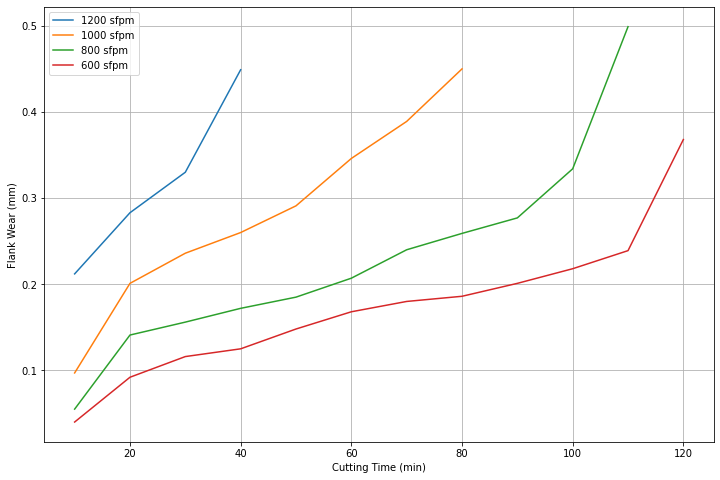

In [230]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
tool_wear_data.plot(x="Cutting Time (min)", ax=ax)
ax.set_ylabel("Flank Wear (mm)")
ax.grid()

In [235]:
data = np.zeros((4,3))
for i, col in enumerate(tool_wear_data.columns[1:]):
    idx = np.where(tool_wear_data[col]>0.3)[0][0]
    wear = tool_wear_data.loc[idx, col]
    time = tool_wear_data.loc[idx, "Cutting Time (min)"]
    speed = re.findall(r'\d+', col)[0]
    data[i] = [speed, time, wear]
tool_life_data = pd.DataFrame(
    data=data,
    columns=["Machining Speed (sfpm)", "Cutting Time (min)", "Flank Wear (mm)"]
)
tool_life_data

,Machining Speed (sfpm),Cutting Time (min),Flank Wear (mm)
0,1200.0,30.0,0.330
1,1000.0,60.0,0.346
2,800.0,100.0,0.334
3,600.0,120.0,0.368


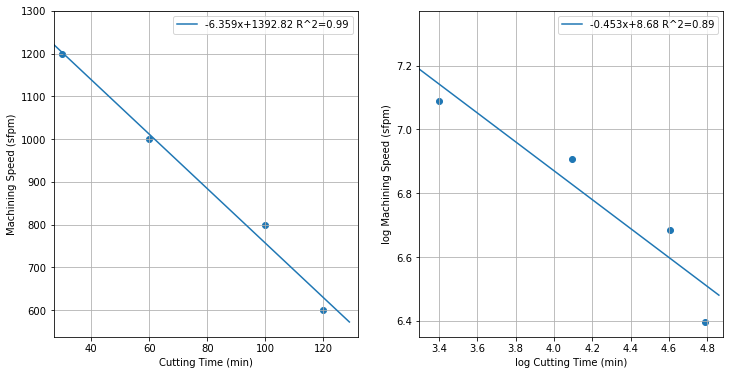

In [236]:
# x_label = "Tool life (min)"
x_label = "Cutting Time (min)"
y_label = "Machining Speed (sfpm)"

fit_lin = linregress(tool_life_data[x_label], tool_life_data[y_label])
fit_log = linregress(np.log(tool_life_data[x_label]), np.log(tool_life_data[y_label]))

fig = plt.figure(figsize=(12,6))
ax1, ax2 = fig.subplots(nrows=1, ncols=2)

xlims = (tool_life_data[x_label].min()*0.9, tool_life_data[x_label].max()*1.1)

fake_x_data = np.arange(tool_life_data[x_label].min()-10, tool_life_data[x_label].max()+10)

ax1.scatter(tool_life_data[x_label], tool_life_data[y_label])
ax1.plot(fake_x_data, fit_lin.slope*fake_x_data+fit_lin.intercept, label=f"{fit_lin.slope:.3f}x+{fit_lin.intercept:.2f} R^2={fit_lin.rvalue**2:.2f}")
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label)
ax1.set_xlim(xlims)
ax1.grid()
ax1.legend()


ax2.scatter(np.log(tool_life_data[x_label]), np.log(tool_life_data[y_label]))
ax2.plot(np.log(fake_x_data), (fit_log.slope*np.log(fake_x_data))+fit_log.intercept, label=f"{fit_log.slope:.3f}x+{fit_log.intercept:.2f} R^2={fit_log.rvalue**2:.2f}")
ax2.set_xlabel("log " + x_label)
ax2.set_ylabel("log " + y_label)
ax2.set_xlim(np.log(xlims))
ax2.grid()
ax2.legend()


In [237]:

machine_surface_filename = "machine_surface.csv"
machine_surface_data = pd.read_csv(machine_surface_filename, delimiter=",")

for col in machine_surface_data.columns:
    machine_surface_data[col] = machine_surface_data[col].astype(float)
machine_surface_data.columns

Index(['Feed rate (ipm)', 'Surface Roughness (RA, μ m)'], dtype='object')

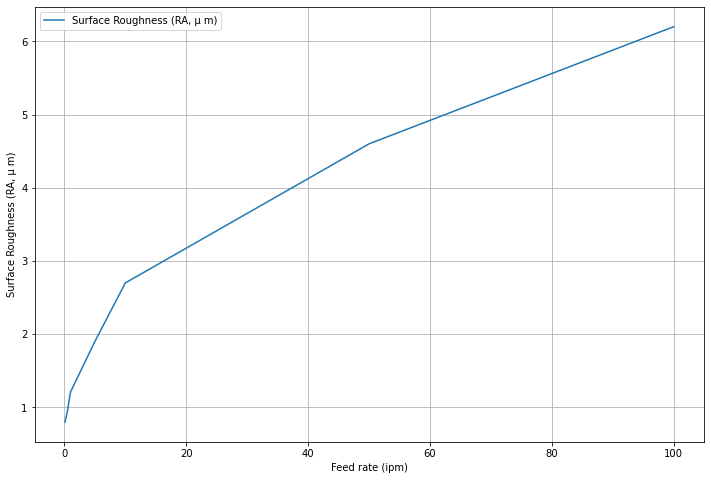

In [240]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
machine_surface_data.plot(x="Feed rate (ipm)", ax=ax)
ax.set_ylabel("Surface Roughness (RA, μ m)")
ax.grid()
